In [1]:
#importadno as bilbiotecas

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels
import yellowbrick

In [107]:
#lendo a dotaset
base_census = pd.read_csv('./census.csv')

In [108]:
base_census.head(3)

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   

        marital-status          occupation    relationship    race    sex  \
0        Never-married        Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse     Exec-managerial         Husband   White   Male   
2             Divorced   Handlers-cleaners   Not-in-family   White   Male   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K

In [109]:
#informações ulteis
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [110]:
#informações ulteis
base_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


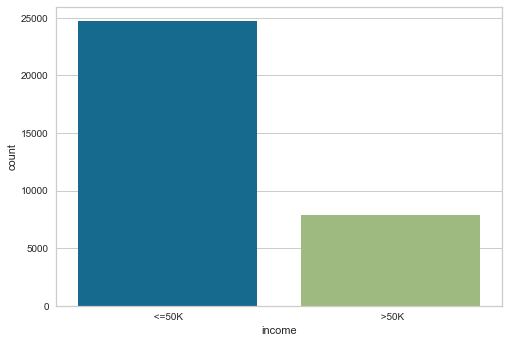

In [111]:
#vizualizando os dados
#a coluna income é o nosso target nesse desafio
sns.countplot(x = base_census['income']);

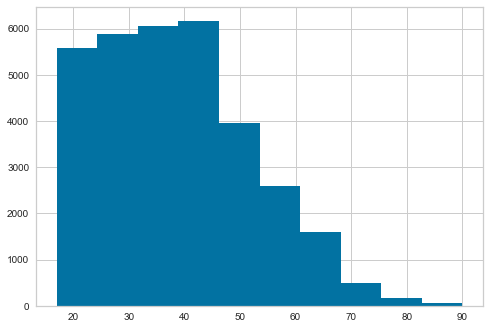

In [112]:
plt.hist(x = base_census['age']);

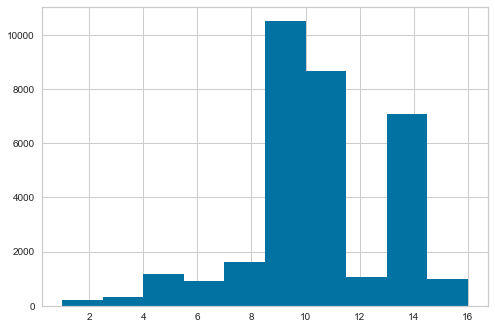

In [113]:
plt.hist(x = base_census['education-num']);

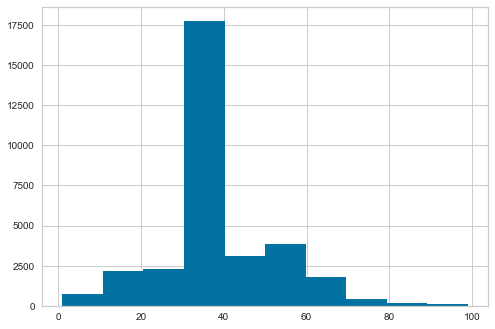

In [114]:
plt.hist(x = base_census['hour-per-week']);

In [115]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

In [116]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [117]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [118]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

In [119]:
#atribuindo divisores e preiditores
#a coluna income é nosso alvo
#vamos atribuila a uma variavel e por fim removela do dataset
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [120]:
target = base_census['income']

In [121]:
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [122]:
base_census = base_census.drop(columns=['income'])

In [123]:
#nova base
base_census.head()

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  
0          2174             0             40   United-States  
1             0             0             13   United-States  
2             0             0             40   United-States  
3             0             0             40   United-States  
4             0             0             40            Cuba

In [124]:
#algumsa coluinas do datset são variaveis categroisa e os algoritimos de aprendizagem de maquina não o interpretam
#devemos tratalas para por fim, usarmos de inteligencia artificial para classificarmos
#usaremos o LabelEncoder para fazer essa atribuições corretamente

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
label_encoder = LabelEncoder()

In [127]:
base_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [128]:
base_census['workclass'] = label_encoder.fit_transform(base_census['workclass'])
base_census['education'] = label_encoder.fit_transform(base_census['education'])
base_census['marital-status'] = label_encoder.fit_transform(base_census['marital-status'])
base_census['occupation'] = label_encoder.fit_transform(base_census['occupation'])
base_census['relationship'] = label_encoder.fit_transform(base_census['relationship'])
base_census['race'] = label_encoder.fit_transform(base_census['race'])
base_census['sex'] = label_encoder.fit_transform(base_census['sex'])
base_census['native-country'] = label_encoder.fit_transform(base_census['native-country'])

#aplicamos também ao target
target = label_encoder.fit_transform(target)

In [129]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [130]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [131]:
base_census = onehotencoder_census.fit_transform(base_census).toarray()

In [132]:
#vamos escalonar ainda mias os valores
#devemos antes normalizar os valores
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
base_census = scaler_census.fit_transform(base_census)
# e por fim atribuirmos os datasetr de treino e test

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(base_census, target, test_size = 0.15, random_state = 0)

In [135]:
#agora podemos usarmos dos algoritoms de aprendizagem de maquina

In [136]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [137]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [138]:
#naive bayers
naive_census = GaussianNB()
naive_census.fit(X_train, y_train)
previsoes = naive_census.predict(X_test)
previsoes

array([1, 1, 1, ..., 0, 1, 1])

In [139]:
accuracy_score(y_test, previsoes)
#acuracia muito baixo, isto quer dize rque talvez esse não seja o melhor modelo para usarmos nesse caso
#vamos usar outros mas vamos olhar as métricas

0.4767656090071648

In [140]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.32      0.48      3693
           1       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



In [141]:
#vamos usar a arvore decisão
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [142]:
previsoes = arvore_census.predict(X_test)
previsoes

array([0, 0, 0, ..., 0, 0, 1])

In [143]:
accuracy_score(y_test, previsoes)
#como esperado, arvore de decisão é um algoritmo melhor para esse caso
#mas podemos melhorar. Vamos olhar outros, mas antes, vejamos as métrica

0.8104401228249745

0.8104401228249745

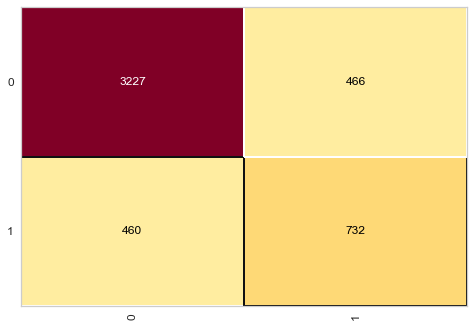

In [144]:
cm = ConfusionMatrix(arvore_census)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [145]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3693
           1       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



In [146]:
#método random forest
random_forest_census = RandomForestClassifier(n_estimators=120, criterion='entropy', random_state = 0)
random_forest_census.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=120, random_state=0)

In [147]:
previsoes = random_forest_census.predict(X_test)
previsoes

array([0, 0, 0, ..., 0, 0, 1])

In [148]:
accuracy_score(y_test, previsoes)
#random forest é ainda melhor, vejamos as métricas

0.8519959058341863

0.8519959058341863

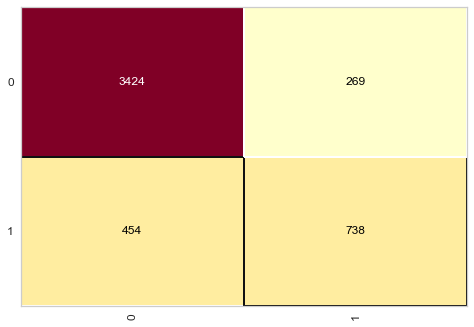

In [149]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [150]:
#aprendizagem basead em intancias knn

In [151]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [152]:
previsoes = knn_census.predict(X_test)
previsoes

array([0, 0, 0, ..., 0, 0, 1])

In [153]:
accuracy_score(y_test, previsoes)
#o modelo random forest é o melhor modleo para esse caso

0.8290685772773797